# Import Libraries

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import mne

from mne.viz import plot_topomap
from mne.io import read_raw_fif
from mne import pick_types

from params import *
from params_power import power_analysis_name
from params_power import fmin, fmax

# Load PSD data

In [3]:
sbj_id = subject_ids[0]
session_id = sessions[0]

# read PSD in the workflow dir; it's in .npz format
psd_fname = os.path.join(data_path, power_analysis_name, 'power',
                         '_sess_index_' + session_id + '_subject_id_' + sbj_id,
                         'power', sbj_id + '_task-rest_run-01_meg_raw_filt_dsamp_ica-psds.npz')

npzfile = np.load(psd_fname)
print('the .npz file contain {} \n'.format(npzfile.files))

# is a matrix with dim n_channels x n_freqs
psds = npzfile['psds']
print('psds is a matrix {} \n'.format(psds.shape))

# list of frequencies in which psds was computed; its length = columns of psds
freqs = npzfile['freqs']
print('freqs contains {} frequencies \n'.format(len(freqs)))

the .npz file contain ['psds', 'freqs'] 

psds is a matrix (270, 97) 

freqs contains 97 frequencies 



# PLOT mean PSD

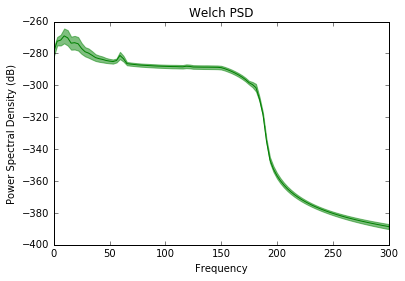

In [4]:
f, ax = plt.subplots()
psds_DB = 10 * np.log10(psds)
psds_mean = psds_DB.mean(0)
psds_std = psds_DB.std(0)

ax.plot(freqs, psds_mean, color='g')
ax.fill_between(freqs, psds_mean - psds_std, psds_mean + psds_std,
                color='g', alpha=.5)
ax.set(title='Welch PSD', xlabel='Frequency',
       ylabel='Power Spectral Density (dB)')
plt.show()

# Read raw data

In [5]:
raw_fname = os.path.join(data_path, sbj_id, session_id, 'meg',
                         sbj_id + '_task-rest_run-01_meg_raw_filt_dsamp_ica.fif')

raw = read_raw_fif(raw_fname, preload=True)
select_sensors = pick_types(raw.info, meg=True, ref_meg=False, eeg=False)
sens_loc = [raw.info['chs'][i]['loc'][:3] for i in select_sensors]
sens_loc = np.array(sens_loc)
sens_name = [raw.info['chs'][i]['ch_name'][:5] for i in select_sensors]
print(sens_loc.shape)

Opening raw data file /media/karim/DATA/omega/sample_BIDS_omega/sub-0003/ses-0001/meg/sub-0003_task-rest_run-01_meg_raw_filt_dsamp_ica.fif...
This filename (/media/karim/DATA/omega/sample_BIDS_omega/sub-0003/ses-0001/meg/sub-0003_task-rest_run-01_meg_raw_filt_dsamp_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
    Read 5 compensation matrices
    Range : 0 ... 479999 =      0.000 ...   599.999 secs
Ready.
Current compensation grade : 3
Reading 0 ... 479999  =      0.000 ...   599.999 secs...


<ipython-input-5-02882c1ba524>:4: RuntimeWarning: This filename (/media/karim/DATA/omega/sample_BIDS_omega/sub-0003/ses-0001/meg/sub-0003_task-rest_run-01_meg_raw_filt_dsamp_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw = read_raw_fif(raw_fname, preload=True)


(270, 3)


# Compute mean PSD for each frequency band

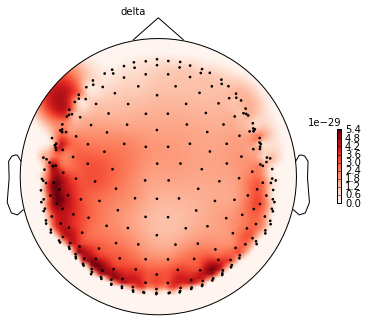

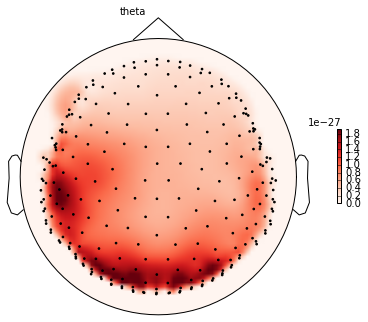

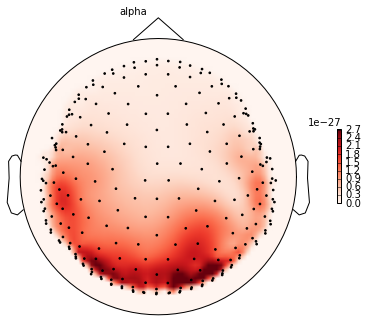

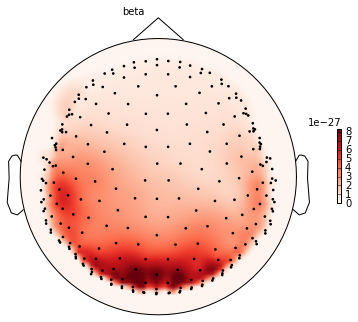

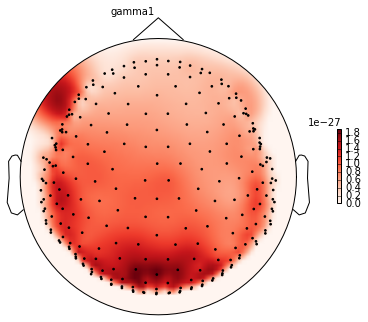

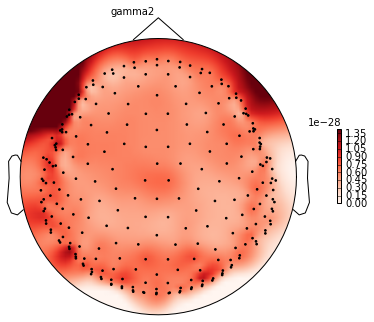

In [8]:
# compute mean psd for each frequency band
freq_bands = [[2, 4], [5, 7], [8, 12], [13, 29], [30, 59], [60, 90]]
freq_band_names = ['delta', 'theta', 'alpha', 'beta', 'gamma1', 'gamma2']

n_chan, _ = psds.shape
n_fr = len(freq_bands)

M_px = np.empty([n_chan, n_fr])

M_px[:, 0] = np.mean(psds[:, (freqs >= 2)*(freqs <= 4)], 1)  # delta
M_px[:, 1] = np.mean(psds[:, (freqs >= 5)*(freqs <= 7)], 1)  # theta
M_px[:, 2] = np.mean(psds[:, (freqs >= 8)*(freqs <= 12)], 1)  # alpha
M_px[:, 3] = np.mean(psds[:, (freqs >= 13)*(freqs <= 29)], 1)  # beta
M_px[:, 4] = np.mean(psds[:, (freqs >= 30)*(freqs <= 59)], 1)  # gamma1
M_px[:, 5] = np.mean(psds[:, (freqs >= 60)*(freqs <= 90)], 1)  # gamma2

minax = -2
maxax = 2

# plot PSD in frequency band, before we need the sensors locations
# read the raw


for f in range(n_fr):
    fig.suptitle(freq_band_names[f])
    fig.colorbar(ax, shrink=0.25)
    fig = plt.figure(figsize=(10, 5))
    ax, _ = plot_topomap(M_px[:, f], sens_loc[:, :2], contours=False)

